In [117]:
import numpy as np
import torch
import pandas as pd
import json
from random import shuffle
from torch.nn.functional import cosine_similarity
cosine = lambda *args: cosine_similarity(*args, dim=0).item()

In [118]:
whisper_embeds_path = '../data/whisper_embeds/whisper_embeds.pt'
tira_embed_path = '../data/whisper_embeds/tira-asr-orig-test.pt'
tira_embed_1k = '../data/whisper_embeds/tira-1k-hf-train.pt'
tira_embed_1k_concat = '../data/whisper_embeds/tira-concat-1k-hf-train.pt'

In [119]:
whisper_embeds = torch.load(whisper_embeds_path)
whisper_embeds.keys()

dict_keys(['fleurs-it_it-test.pt', 'fleurs-lt_lt-test.pt', 'fleurs-hu_hu-test.pt', 'fleurs-nb_no-test.pt', 'fleurs-fr_fr-test.pt', 'fleurs-tr_tr-test.pt', 'fleurs-ln_cd-test.pt', 'fleurs-az_az-test.pt', 'fleurs-uz_uz-test.pt', 'fleurs-kk_kz-test.pt', 'fleurs-ar_eg-test.pt', 'fleurs-km_kh-test.pt', 'fleurs-el_gr-test.pt', 'fleurs-te_in-test.pt', 'fleurs-sw_ke-test.pt', 'fleurs-hi_in-test.pt', 'fleurs-sk_sk-test.pt', 'fleurs-mk_mk-test.pt', 'fleurs-sn_zw-test.pt', 'fleurs-fi_fi-test.pt', 'fleurs-mr_in-test.pt', 'fleurs-ca_es-test.pt', 'fleurs-fa_ir-test.pt', 'fleurs-as_in-test.pt', 'fleurs-hy_am-test.pt', 'fleurs-ro_ro-test.pt', 'fleurs-lb_lu-test.pt', 'fleurs-mn_mn-test.pt', 'fleurs-oc_fr-test.pt', 'fleurs-bg_bg-test.pt', 'fleurs-et_ee-test.pt', 'fleurs-vi_vn-test.pt', 'fleurs-sd_in-test.pt', 'fleurs-ur_pk-test.pt', 'fleurs-ps_af-test.pt', 'fleurs-es_419-test.pt', 'fleurs-ne_np-test.pt', 'fleurs-lv_lv-test.pt', 'fleurs-bn_in-test.pt', 'fleurs-tg_tj-test.pt', 'fleurs-ka_ge-test.pt', 'fle

In [120]:
tira_embeds = torch.load(tira_embed_1k_concat)#whisper_embeds['tira-asr-orig-test.pt']
tira_embeds.shape

torch.Size([1280])

In [121]:
whisper_embeds['tira']=tira_embeds
whisper_embeds.pop('tira-asr-orig-test.pt', None)

tensor([ 0.4284, -0.8002,  0.1050,  ..., -0.1635, -0.2039,  0.7403])

In [122]:
cos_sim = []
langs = list(whisper_embeds.keys())
shuffle(langs)
embeds = []
for lang in langs:
    cos_sim.append(cosine(whisper_embeds[lang], tira_embeds))
    embeds.append(whisper_embeds[lang])
cos_sim[:5], max(cos_sim)

([-0.018587879836559296,
  1.0000001192092896,
  -0.022272152826189995,
  -0.012416456826031208,
  -0.018429117277264595],
 1.0000001192092896)

In [123]:
df=pd.DataFrame({'embeds_file': langs, 'cos_sim': cos_sim})
df.head()

,embeds_file,cos_sim
0,fleurs-sv_se-test.pt,-0.018588
1,tira,1.000000
2,fleurs-jv_id-test.pt,-0.022272
3,fleurs-oc_fr-test.pt,-0.012416
4,fleurs-he_il-test.pt,-0.018429


In [124]:
lang_code = df['embeds_file'].apply(lambda s: s.replace('fleurs-','').replace('-test.pt',''))
df['lang_code']=lang_code
df.head()

,embeds_file,cos_sim,lang_code
0,fleurs-sv_se-test.pt,-0.018588,sv_se
1,tira,1.000000,tira
2,fleurs-jv_id-test.pt,-0.022272,jv_id
3,fleurs-oc_fr-test.pt,-0.012416,oc_fr
4,fleurs-he_il-test.pt,-0.018429,he_il


In [125]:
lang_code_path = '../meta/language_codes.json'
with open(lang_code_path) as f:
    lang_code_dict = json.load(f)
lang_code_dict.append({'fleurs': 'tira', 'whisper': 'tira'})
lang_code_dict

[{'iso2': 'en',
  'iso3': 'eng',
  'whisper': 'english',
  'fleurs': 'en_us',
  'fleurs_script': 'Latn'},
 {'iso2': 'de',
  'iso3': 'deu',
  'whisper': 'german',
  'fleurs': 'de_de',
  'fleurs_script': 'Latn'},
 {'iso2': 'es',
  'iso3': 'spa',
  'whisper': 'spanish',
  'fleurs': 'es_419',
  'fleurs_script': 'Latn'},
 {'iso2': 'ru',
  'iso3': 'rus',
  'whisper': 'russian',
  'fleurs': 'ru_ru',
  'fleurs_script': 'Cyrl'},
 {'iso2': 'ko',
  'iso3': 'kor',
  'whisper': 'korean',
  'fleurs': 'ko_kr',
  'fleurs_script': 'Hang'},
 {'iso2': 'fr',
  'iso3': 'fra',
  'whisper': 'french',
  'fleurs': 'fr_fr',
  'fleurs_script': 'Latn'},
 {'iso2': 'ja',
  'iso3': 'jpn',
  'whisper': 'japanese',
  'fleurs': 'ja_jp',
  'fleurs_script': ''},
 {'iso2': 'pt',
  'iso3': 'por',
  'whisper': 'portuguese',
  'fleurs': 'pt_br',
  'fleurs_script': 'Latn'},
 {'iso2': 'tr',
  'iso3': 'tur',
  'whisper': 'turkish',
  'fleurs': 'tr_tr',
  'fleurs_script': 'Latn'},
 {'iso2': 'pl',
  'iso3': 'pol',
  'whisper': 'p

In [126]:
code_to_lang = lambda lang_code: [lang['whisper'] for lang in lang_code_dict if lang['fleurs']==lang_code][0]
lang_names = df['lang_code'].apply(code_to_lang)
df['lang']=lang_names
df.head()

,embeds_file,cos_sim,lang_code,lang
0,fleurs-sv_se-test.pt,-0.018588,sv_se,swedish
1,tira,1.000000,tira,tira
2,fleurs-jv_id-test.pt,-0.022272,jv_id,javanese
3,fleurs-oc_fr-test.pt,-0.012416,oc_fr,occitan
4,fleurs-he_il-test.pt,-0.018429,he_il,hebrew


In [127]:
df.sort_values('cos_sim', ascending=False)

,embeds_file,cos_sim,lang_code,lang
1,tira,1.000000,tira,tira
42,fleurs-mk_mk-test.pt,-0.010236,mk_mk,macedonian
33,fleurs-kk_kz-test.pt,-0.011230,kk_kz,kazakh
46,fleurs-et_ee-test.pt,-0.011429,et_ee,estonian
16,fleurs-ka_ge-test.pt,-0.011593,ka_ge,georgian
...,...,...,...,...
66,fleurs-az_az-test.pt,-0.020134,az_az,azerbaijani
9,fleurs-so_so-test.pt,-0.021343,so_so,somali
44,fleurs-id_id-test.pt,-0.021898,id_id,indonesian
48,fleurs-ro_ro-test.pt,-0.021929,ro_ro,romanian


In [128]:
lang_to_embeds_file = {}
add_pair = lambda r: lang_to_embeds_file.update({r['lang']:r['embeds_file']})
df.apply(add_pair, axis=1)
lang_to_embeds_file['tira']='tira'
lang_to_embeds_file

{'swedish': 'fleurs-sv_se-test.pt',
 'tira': 'tira',
 'javanese': 'fleurs-jv_id-test.pt',
 'occitan': 'fleurs-oc_fr-test.pt',
 'hebrew': 'fleurs-he_il-test.pt',
 'bengali': 'fleurs-bn_in-test.pt',
 'turkish': 'fleurs-tr_tr-test.pt',
 'german': 'fleurs-de_de-test.pt',
 'norwegian': 'fleurs-nb_no-test.pt',
 'somali': 'fleurs-so_so-test.pt',
 'japanese': 'fleurs-ja_jp-test.pt',
 'slovenian': 'fleurs-sl_si-test.pt',
 'persian': 'fleurs-fa_ir-test.pt',
 'greek': 'fleurs-el_gr-test.pt',
 'serbian': 'fleurs-sr_rs-test.pt',
 'dutch': 'fleurs-nl_nl-test.pt',
 'georgian': 'fleurs-ka_ge-test.pt',
 'belarusian': 'fleurs-be_by-test.pt',
 'yoruba': 'fleurs-yo_ng-test.pt',
 'sindhi': 'fleurs-sd_in-test.pt',
 'telugu': 'fleurs-te_in-test.pt',
 'swahili': 'fleurs-sw_ke-test.pt',
 'punjabi': 'fleurs-pa_in-test.pt',
 'czech': 'fleurs-cs_cz-test.pt',
 'mongolian': 'fleurs-mn_mn-test.pt',
 'french': 'fleurs-fr_fr-test.pt',
 'afrikaans': 'fleurs-af_za-test.pt',
 'croatian': 'fleurs-hr_hr-test.pt',
 'galicia

In [129]:
def compare_langs(lang1, lang2):
    embed1 = whisper_embeds[lang_to_embeds_file[lang1]]
    embed2 = whisper_embeds[lang_to_embeds_file[lang2]]
    return cosine(embed1, embed2)

compare_langs('punjabi', 'tira')

-0.01585371047258377

In [130]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cosine, pdist, squareform
import seaborn
import matplotlib.pyplot as plt

In [131]:
dist_mat=squareform(pdist(embeds,cosine))
dist_mat.shape

(80, 80)

In [132]:
dist_df=pd.DataFrame(dist_mat, index=lang_names, columns=lang_names)
dist_df.head()

lang_code,swedish,tira,javanese,occitan,hebrew,bengali,turkish,german,norwegian,somali,...,arabic,korean,welsh,polish,malay,latvian,lingala,shona,urdu,hungarian
lang_code,,,,,,,,,,,,,,,,,,,,,
swedish,0.000000,1.018588,0.018323,0.030907,0.006170,0.017425,0.003743,0.004120,0.020497,0.008959,...,0.008829,0.026309,0.006098,0.026721,0.003191,0.012662,0.032353,0.030705,0.022219,0.004658
tira,1.018588,0.000000,1.022272,1.012416,1.018429,1.017121,1.016712,1.017966,1.016515,1.021343,...,1.014476,1.012839,1.016769,1.014946,1.019886,1.014881,1.020045,1.012201,1.012972,1.019385
javanese,0.018323,1.022272,0.000000,0.023256,0.026394,0.006593,0.020399,0.029456,0.039054,0.009187,...,0.036029,0.072182,0.032174,0.076226,0.014552,0.046551,0.008578,0.056596,0.066452,0.027477
occitan,0.030907,1.012416,0.023256,0.000000,0.040385,0.016447,0.027701,0.041216,0.031753,0.025108,...,0.042373,0.091586,0.039493,0.096033,0.033891,0.064705,0.028522,0.086315,0.084264,0.039096
hebrew,0.006170,1.018429,0.026394,0.040385,0.000000,0.026208,0.006927,0.013122,0.024507,0.011240,...,0.010297,0.025735,0.013727,0.025821,0.005569,0.016517,0.039632,0.027215,0.026688,0.006396


In [133]:
lang_names.tolist()

['swedish',
 'tira',
 'javanese',
 'occitan',
 'hebrew',
 'bengali',
 'turkish',
 'german',
 'norwegian',
 'somali',
 'japanese',
 'slovenian',
 'persian',
 'greek',
 'serbian',
 'dutch',
 'georgian',
 'belarusian',
 'yoruba',
 'sindhi',
 'telugu',
 'swahili',
 'punjabi',
 'czech',
 'mongolian',
 'french',
 'afrikaans',
 'croatian',
 'galician',
 'spanish',
 'tamil',
 'armenian',
 'maltese',
 'kazakh',
 'slovak',
 'kannada',
 'tajik',
 'gujarati',
 'assamese',
 'italian',
 'nepali',
 'marathi',
 'macedonian',
 'luxembourgish',
 'indonesian',
 'thai',
 'estonian',
 'hindi',
 'romanian',
 'uzbek',
 'hausa',
 'amharic',
 'ukrainian',
 'maori',
 'pashto',
 'khmer',
 'english',
 'malayalam',
 'bosnian',
 'catalan',
 'bulgarian',
 'russian',
 'portuguese',
 'icelandic',
 'lithuanian',
 'danish',
 'azerbaijani',
 'lao',
 'vietnamese',
 'finnish',
 'arabic',
 'korean',
 'welsh',
 'polish',
 'malay',
 'latvian',
 'lingala',
 'shona',
 'urdu',
 'hungarian']

In [134]:
dist_df['tira']

lang_code
swedish      1.018588
tira         0.000000
javanese     1.022272
occitan      1.012416
hebrew       1.018429
               ...   
latvian      1.014881
lingala      1.020045
shona        1.012201
urdu         1.012972
hungarian    1.019385
Name: tira, Length: 80, dtype: float64

In [135]:
dist_df.to_csv('../data/whisper_embeds/dist_matrix.csv')

In [136]:
# dist_df = dist_df.drop('tira', axis=1)
# dist_df = dist_df.drop('tira', axis=0)

<Axes: xlabel='lang_code', ylabel='lang_code'>

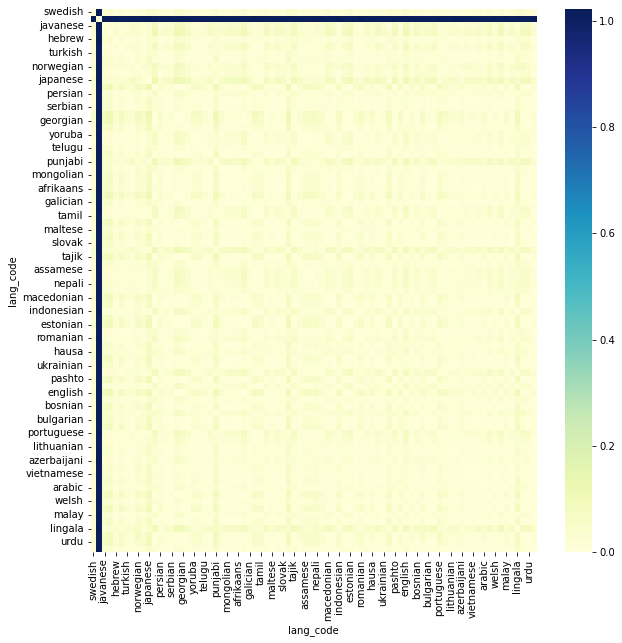

In [137]:
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(dist_df, cmap='YlGnBu')